In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## One-hot encoding

In [2]:
v = np.array(['yes','no','no','maybe','no','maybe'])
v

array(['yes', 'no', 'no', 'maybe', 'no', 'maybe'], dtype='<U5')

In [3]:
labels = np.unique(v)
labels

array(['maybe', 'no', 'yes'], dtype='<U5')

In [4]:
dic_labels = {'maybe' : 0, 'no' : 1, 'yes' : 2}
dic_labels

{'maybe': 0, 'no': 1, 'yes': 2}

In [5]:
dic_labels['yes']

2

In [6]:
# using dictionary comprehension
dic_labels = {labels[i]:i for i in range(len(labels))}
dic_labels

{'maybe': 0, 'no': 1, 'yes': 2}

In [7]:
# ordinal encoding
ord_labels = np.array([dic_labels[v[i]] for i in range(len(v))])
ord_labels

array([2, 1, 1, 0, 1, 0])

In [8]:
# one-hot encoding
V = np.zeros((len(v),len(labels)))
V[np.arange(len(v)),ord_labels] = 1
V

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [9]:
def one_hot_encoding(v):
    # labels
    labels = np.unique(v)
    # ordinal encoding
    dic_labels = {labels[i]:i for i in range(len(labels))}
    ord_labels = np.array([dic_labels[v[i]] for i in range(len(v))])
    # one-hot encoding
    V = np.zeros((len(v),len(labels)))
    V[np.arange(len(v)),ord_labels] = 1
    return V

In [10]:
# check that our function works
one_hot_encoding(v)

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

## Fremont bridge traffic dataset

In [11]:
# load Fremont traffic dataset
data = pd.read_csv('Fremont.csv',index_col='Date',parse_dates=True)
data

,traffic,day_of_week,month,year,covid,holiday,hours_daylight,TAVG,PRCP,AWND,SNOW
Date,,,,,,,,,,,
2012-10-03,7042.0,2,10,2012,0,0.0,11.277359,56.0,0.00,16.33,0.0
2012-10-04,6950.0,3,10,2012,0,0.0,11.219142,56.5,0.00,14.54,0.0
2012-10-05,6296.0,4,10,2012,0,0.0,11.161038,59.5,0.00,12.75,0.0
2012-10-06,4012.0,5,10,2012,0,0.0,11.103056,60.5,0.00,11.41,0.0
2012-10-07,4284.0,6,10,2012,0,0.0,11.045208,60.5,0.00,2.91,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,2485.0,4,8,2021,1,0.0,13.446695,61.0,0.02,8.28,0.0
2021-08-28,2973.0,5,8,2021,1,0.0,13.390430,62.0,0.00,8.28,0.0
2021-08-29,2634.0,6,8,2021,1,0.0,13.333938,66.0,0.00,6.49,0.0


The columns are:

- traffic: number of bikes that cross the Fremont bridge (Seattle)
- day_of_week: 0 (Monday), 1 (Tuesday), etc
- month: 1 (Jan), 2 (Feb), 3 (Mar), etc
- year: 
- covid: 1 (pandemic), 0 (no pandemic)
- holiday: 1 (holiday), 0 (no holiday)
- hours_daylight: hours of daylight
- TAVG: Average temperature
- PRCP: Precipitation
- AWND: Average wind speed
- SNOW: Snowfall

<AxesSubplot:xlabel='Date'>

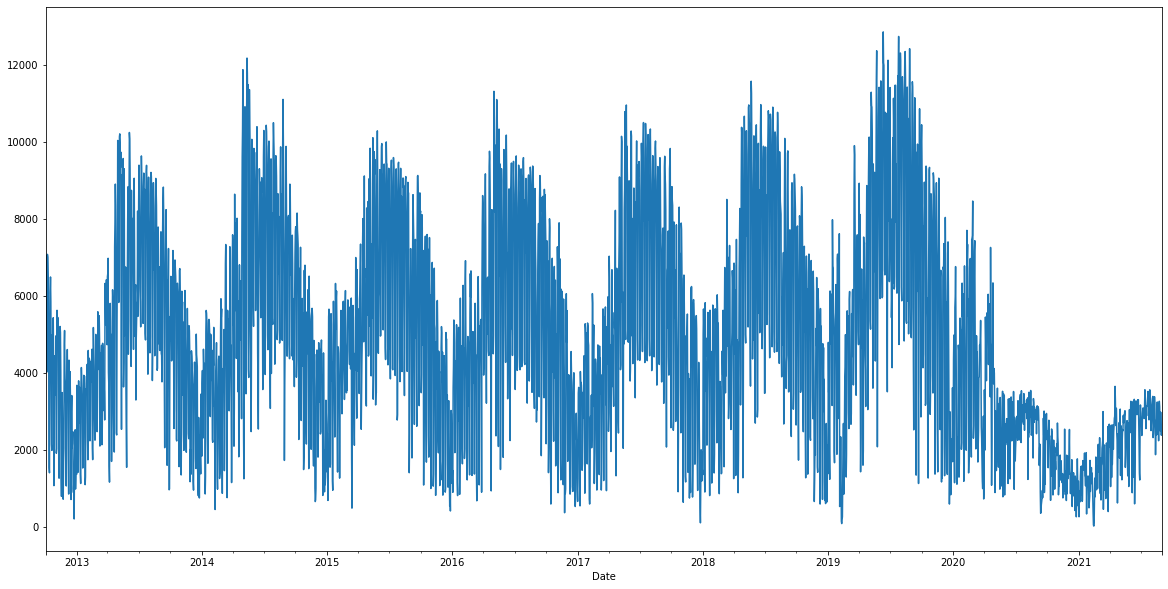

In [12]:
plt.figure(figsize=(20,10))
data['traffic'].plot()

In [13]:
# target vector 
y = data.traffic.to_numpy()

In [14]:
# numerical features: 
X = data[['year','covid','holiday','hours_daylight','TAVG','PRCP','AWND','SNOW']].to_numpy()
X.shape

(3255, 8)

In [15]:
# day of the week
X = np.c_[X,one_hot_encoding(data['day_of_week'].to_numpy())]

In [16]:
X.shape

(3255, 15)

In [17]:
# month
X = np.c_[X,one_hot_encoding(data['month'].to_numpy())]

In [18]:
X.shape

(3255, 27)

In [19]:
# polynomial features 
def build_poly_features(X,degree):
    from itertools import combinations_with_replacement as comb_w_r
    from itertools import chain
    
    # number of datapoints (rows), number of features (columns)
    try:
        m,n = X.shape # this won't work if X is a vector (n=1 features)
    except: 
        m = len(X)
        n = 1
        X = X.reshape(m,1) #  
    
    # number of polynomial features
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))
    n_poly = sum(1 for combination in combinations) 
    
    # polynomial features matrix
    X_poly = np.ones((m,n_poly))
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))\
    
    
    for column_index, combination in enumerate(combinations):
        X_poly[:,column_index] = np.prod(X[:,combination],axis=1)
        
    return X_poly



In [20]:
# no polynomial features
X_poly = build_poly_features(X,degree=1) # it will add the column of all-ones

In [21]:
X_poly.shape

(3255, 28)

In [22]:
# least squares problem
theta = np.linalg.lstsq(X_poly,y,rcond=None)[0]
theta.shape

(28,)

In [23]:
# prediction
data['prediction'] = X_poly.dot(theta)

<AxesSubplot:xlabel='Date'>

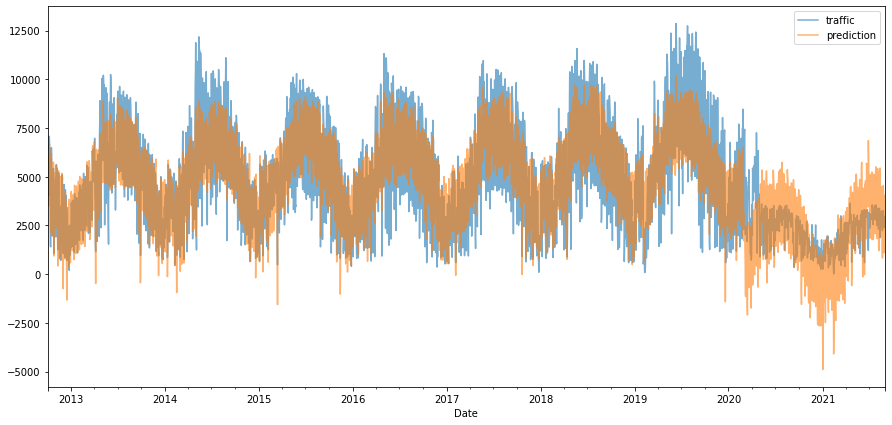

In [24]:
# plot actual traffic and the predictions
data[['traffic','prediction']].plot(figsize=(15,7),alpha=0.6)

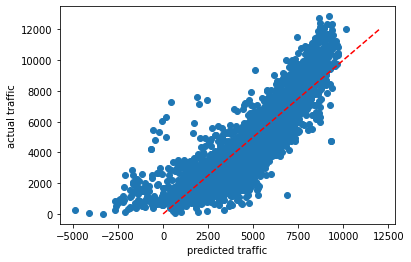

In [25]:
# plot actual against predicted
plt.scatter(data['prediction'],data['traffic'])
plt.ylabel('actual traffic')
plt.xlabel('predicted traffic')
plt.plot([0,12000],[0,12000],'--', color='red')

In [26]:
# with  polynomial features
X_poly = build_poly_features(X,degree=2)
X_poly.shape

(3255, 406)

In [27]:
# least squares problem
theta = np.linalg.lstsq(X_poly,y,rcond=None)[0]
theta.shape

(406,)

In [28]:
# prediction
data['prediction'] = X_poly.dot(theta)

<AxesSubplot:xlabel='Date'>

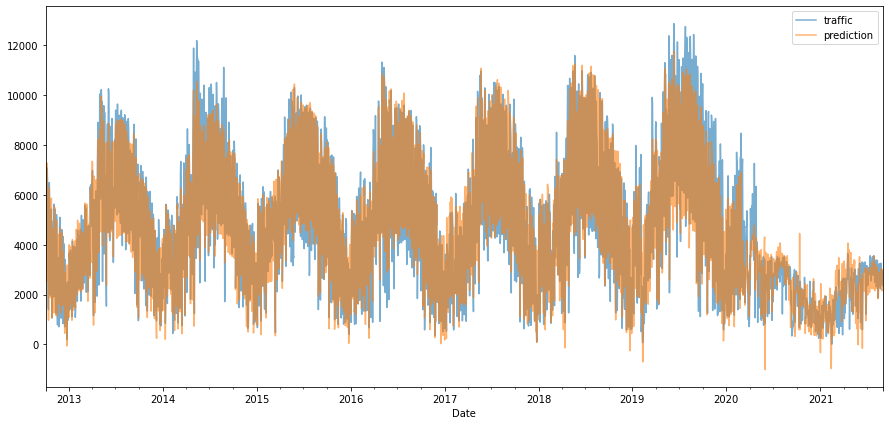

In [31]:
# plot actual traffic and the predictions
data[['traffic','prediction']].plot(figsize=(15,7),alpha=0.6)

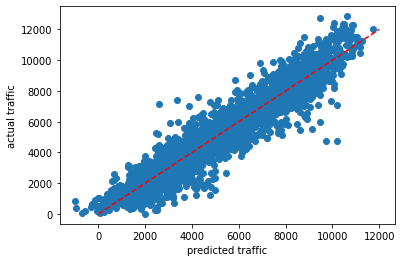

In [30]:
# plot actual against predicted
plt.scatter(data['prediction'],data['traffic'])
plt.ylabel('actual traffic')
plt.xlabel('predicted traffic')
plt.plot([0,12000],[0,12000],'--', color='red')